<a href="https://colab.research.google.com/github/iamprakashom/Stackoverflow-Tag-Analysis-and-Prediction/blob/master/Stackoverflow_Tag_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;font-size:30px;" > Stack Overflow: Tag Prediction </h1>

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Real World / Business Objectives and Constraints </h2>

#### 1. Predict as many tags as possible with high precision and recall.
 
 So for this problem we should get high precision and high recall rates. For example, let’s assume that we have a  
 title, description with 4 tags. If we want to predict any of the tags we should have a high precision value i.e, 
 we have to be really sure that the predicted tag belongs to the given question. Also, we want to have a high Recal 
 rate, which means If the tag actually supposed to be present, we want it to be present most number of times.

#### 2. Incorrect tags could impact customer experience on StackOverflow.

 For example, we have 4 actual tags t1,t2,t3 and t4. (i) Suppose if we predict t5, which turns out to be an 
 incorrect tag or (ii) The given t4 is an inappropriate tag or (iii) If we didn’t predicted an important tag.

 So from the above mentioned cases, If we predict an incorrect tag then Precision will decrease and If we missed  
 out an important tag then Recall will decrease. So both are impacting customer experience very badly. To 
 understand it in a better way, lets say If we predict ‘C#’ tag to a question which is related to C language, 
 People who get the message or notification from Stack Overflow may not be an expert in C language or If the 
 question is actually related to ‘C#’ and If we missed out stating the tag then we could send the question to a 
 wrong person, this will create a mess and impacts the business of Stack Overflow.

#### 3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />

<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />

__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />

<b>Id</b> - Unique identifier for each question<br/>
<b>Title</b> - The question's title<br/>
<b>Body</b> - The body of the question<br/>
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />


<br />

<h3>2.1.2 Example Data point </h3>

<b>Id</b>: 5

<b>Title:</b> How to modify whois contact details?

<b>Body:</b>

<pre>
&lt;pre&gt;
    &lt;code&gt;
    function modify(.......)
    {
        $mcontact = file_get_contents( "https://test.httpapi.com/api/contacts/modify.json?auth-userid=$uid&amp;auth-password=$pass&amp;contact-id=$cid&amp;name=$name &amp;company=$company&amp;email=$email&amp;address-line-1=$street&amp;city=$city&amp;country=$country&amp;zipcode=$pincode&amp;phone-cc=$countryCodeList[$phc]&amp;phone=$phone" );
        $mdetails = json_decode( $mcontact, true );
        return $mdetails;
    }
    &lt;/code&gt;
&lt;/pre&gt;
&lt;p&gt;using this modify function, displays warning mesage&lt;/p&gt;
&lt;pre class="lang-none prettyprint-override">
    &lt;code&gt;
    Warning: file_get_contents(https://...@hihfg.com&amp;address-line-1=3,dfgdf,fgdf&amp;city=dfgfd&amp;country=India&amp;zipcode=641005&amp;phone-cc=91&amp;phone=756657)
        [function.file-get-contents]: failed to open stream: HTTP request failed!
        HTTP/1.0 400 Bad request in /home/gfdgfd/public_html/new_one/customer/account/class.whois.php on line 49\n
    &lt;/code&gt;
&lt;/pre&gt;
&lt;p&gt;Please help me, modify contact details.&lt;/p&gt;
</pre>

<b>Tags</b>: php api file-get-contents

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<b>It is a multi-label classification problem.</b> **

A data set which contains xi and yi and yi belongs to one of the two classes/labels ‘0’ or ‘1’ is called a **Binary Classification Problem**. And If the yi belongs to two or more values, let’s say 0,1,2,3,4,5,6,7,8,9 and can’t belongs to two classes at a time is called a  **Multi-class classification problem**.

But our present problem is entirely a different one compare to the above mentioned. We have xi,yi and yi is a set in itself! Because our yi’s represents tags in the questions and xi’s represents questions and a question in the Stack Overflow can have multiple tags Q1 = {t1,t2,t3,t4,…etc}.
There could be questions like
Q1 = {t1,t2,t3,t4}
Q2 = {t1,t2,t3}
Q3 = {t1,t2}

So our yi is a set of classes. This problem is called a **Multi-label Classification**.

**Multi-label Classification**: Multi-label classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stack Overflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. Go through the link and know more details about Multi Label Classification ( http://scikit-learn.org/stable/modules/multiclass.html)


### 2.2.2 Performance metric

1. Micro F1 score
2. Macro F1 score:

I have discussed in detail about the performance metrices in my one of my [blog](https://goo.gl/Z4AP95) post. Please read [this](https://goo.gl/UJdNps) blog to know more about Micro & Macro F1 scores.

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"iamprakashom","key":"2f0ebf5dd4e47060e67ccb04715e7d72"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#!kaggle datasets list

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle competitions download -c facebook-recruiting-iii-keyword-extraction

Train.zip: Skipping, found more recently modified local copy (use --force to force download)
Test.zip: Skipping, found more recently modified local copy (use --force to force download)
SampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import os
import zipfile
os.chdir('/content')
for file in os.listdir():
    if file.endswith(".zip"):
        zip_ref = zipfile.ZipFile(file, 'r')
        zip_ref.extractall()
        zip_ref.close()
    else:
        pass

In [24]:
!ls

'kaggle (1).json'   sample_data		   Test.csv   Train.csv
 kaggle.json	    SampleSubmission.csv   Test.zip   Train.zip


In [25]:
import warnings
# warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import datetime as dt
from sqlalchemy import create_engine # database connection
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from collections import Counter
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df_train = pd.read_csv('Train.csv',nrows=100000) #Due to my system's hardware limitations, I am considering only 100000 rows

In [27]:
df_train.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [28]:
df_train.shape

(100000, 4)

### Helper function for reading and writing pickle file

In [0]:
def save_file(data, file_name):
    with open(file_name+'.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_file(file_name):
    with open(file_name+'.pickle', 'rb') as handle:
        return pickle.load(handle)

#### Duplicate question

In [0]:
dup_df_train = df_train.groupby(['Title', 'Body', 'Tags']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [32]:
dup_df_train.head()

,Title,Body,Tags,counts
57377,Packages are installed on server but not displ...,<p>I have installed imagemagick and ffmpeg on ...,ffmpeg imagemagick godaddy phpinfo,3
95688,questions about how to use LVM,<p>I have an LVM partition in use already so i...,linux lvm,3
46098,Is there any Code Style Analysis Tool for C#?,"<p>Here in Brazil we call it ""Padrão de Codifi...",c# coding-style code-review,2
96550,select tag color doesnt show in firefox,<p>I have a webpage with a simple select dropd...,html firefox,2
5947,Attaching a disconnected object to an NHiberna...,<p>My repository works in a <code>UnitOfWork</...,c# nhibernate,2


###  Removing duplicates

In [33]:
number_of_rows_before_removing_duplicates = df_train.shape[0]
print ("Total number of rows before removing duplicates: ", number_of_rows_before_removing_duplicates)
dup_df_train = df_train.groupby(['Title', 'Body', 'Tags']).size().reset_index(name='counts')
print("duplicate rows details:",dup_df_train['counts'].value_counts())
df_train.drop_duplicates(subset=['Title', 'Body', 'Tags'], inplace=True)

print("--"*15)
print("number of duplicate question: ", number_of_rows_before_removing_duplicates-df_train.shape[0])
print("percentage of duplicate question: ", ((number_of_rows_before_removing_duplicates-df_train.shape[0])/number_of_rows_before_removing_duplicates)*100.0 , "%")
print("number of rows before removing duplicates: ", number_of_rows_before_removing_duplicates)
print("number of rows after removing duplicates: ", df_train.shape[0])

Total number of rows before removing duplicates:  100000
duplicate rows details: 1    98874
2      560
3        2
Name: counts, dtype: int64
------------------------------
number of duplicate question:  564
percentage of duplicate question:  0.5640000000000001 %
number of rows before removing duplicates:  100000
number of rows after removing duplicates:  99436


In [34]:
df_train.shape

(99436, 4)

In [0]:
# Tags count for each question
df_train['tag_count'] = df_train['Tags'].apply(lambda text: len(text.strip().split()))

## Tag analysis

In [36]:
df_train.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


### Count unique tagsv- Tag Frequency

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df_train['Tags'])

In [0]:
vectorizer = CountVectorizer(tokenizer= lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df_train['Tags'])

In [39]:
tag_dtm.shape

(99436, 18448)

In [40]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])
tags = vectorizer.get_feature_names()
print("Top 10 important tags: ", tags[:10])

Number of data points : 99436
Number of unique tags : 18448
Top 10 important tags:  ['.a', '.bash-profile', '.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net']


In [41]:
freqs = tag_dtm.sum(axis=0).A1
dict(zip(tags, freqs)).items()

dict_items([('.a', 2), ('.bash-profile', 1), ('.class-file', 1), ('.each', 6), ('.emf', 2), ('.hgtags', 2), ('.htaccess', 331), ('.htpasswd', 1), ('.mov', 1), ('.net', 2668), ('.net-1.1', 3), ('.net-2.0', 31), ('.net-3.5', 84), ('.net-4.0', 125), ('.net-4.5', 17), ('.net-assembly', 22), ('.net-cf-3.5', 1), ('.net-framework', 5), ('.net-install', 1), ('.net-micro-framework', 2), ('.net-remoting', 4), ('.net-security', 1), ('.net2.0', 1), ('.net3.5', 1), ('.net4.0', 2), ('.nettiers', 2), ('.obj', 1), ('.post', 4), ('.rdlc', 1), ('.refresh', 1), ('.sdf', 1), ('.war', 1), ('.wav', 1), ('.x', 2), ('1080p', 2), ('10gbethernet', 2), ('10gige', 1), ('16bit', 2), ('1and1', 2), ('2-legged', 1), ('2-tier', 1), ('2003', 2), ('2007', 71), ('2010', 106), ('2013', 13), ('24bit', 1), ('24hour', 1), ('2d', 35), ('2d-array', 9), ('2d-games', 1), ('2wire', 2), ('3-tier', 3), ('3.0', 14), ('3.0.1', 1), ('3.1', 1), ('301', 2), ('301-redirect', 1), ('32-bit', 13), ('32-vs-64-bit', 1), ('3270', 1), ('32bit',

In [0]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))
tag_frequency_df = pd.DataFrame(list(result.items()), columns=['Tags', 'Counts'])

In [43]:
# Saving tag frequency as csv file
!mkdir csv
if not os.path.isfile('csv/tag_frequency_df.csv'):
    with open('csv/tag_frequency_df.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])

tag_frequency_df = pd.read_csv("csv/tag_frequency_df.csv", names=['Tags', 'Counts'])
tag_frequency_df.head()

,Tags,Counts
0,.a,2
1,.bash-profile,1
2,.class-file,1
3,.each,6
4,.emf,2


In [0]:
# Saving tag frequency file as pickle file
!mkdir pickles
if not os.path.isfile('pickles/tag_frequency_df.pickle'):
    save_file(tag_frequency_df,'pickles/tag_frequency_df')
tag_frequency_df = read_file('pickles/tag_frequency_df')

In [0]:

tag_df = tag_frequency_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df['Counts'].values

In [46]:
tag_counts.sum()

286677

### Plot 'Tags' Vs 'frequency of their appearances'

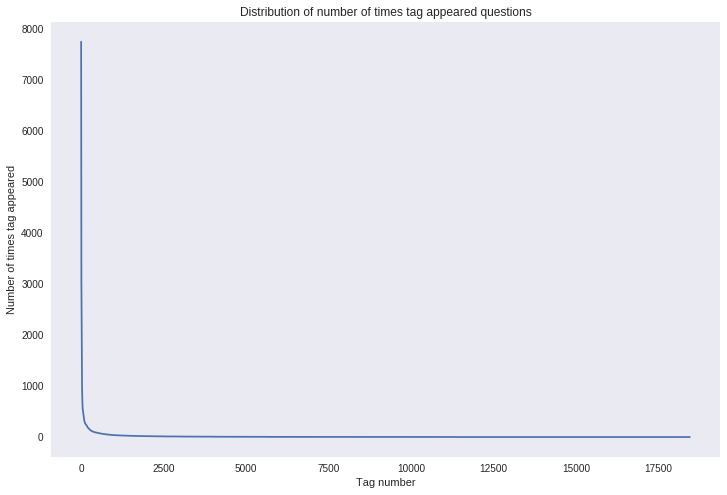

In [47]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

### lets zoom in since it is highly skewed - First 500 tags

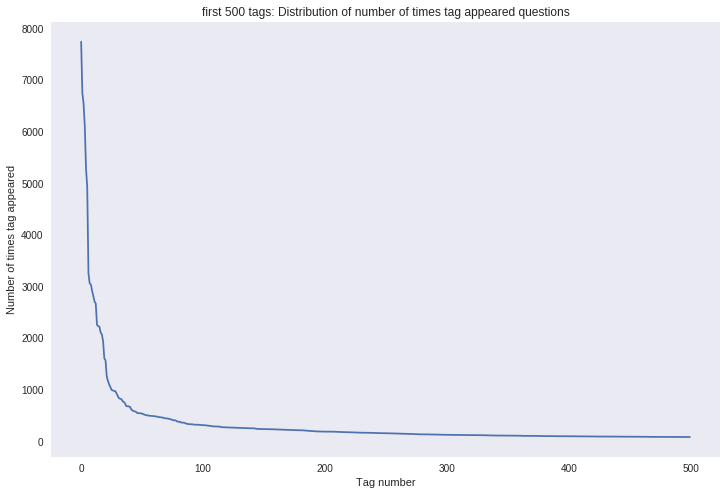

In [48]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

### lets zoom in more to find more details - First 100 tags

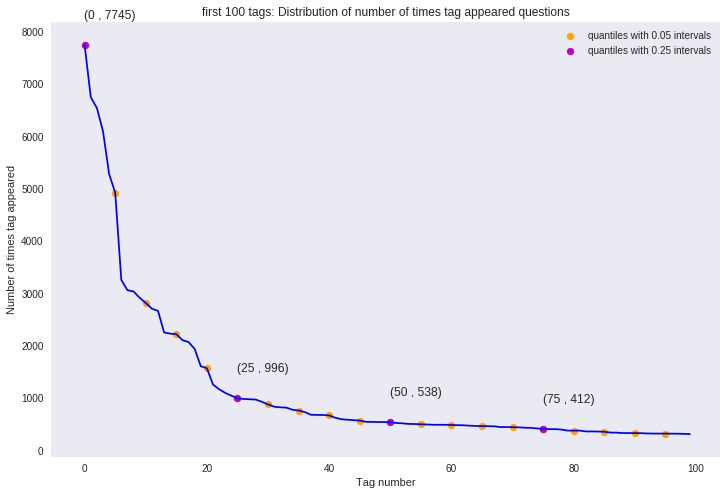

20 [7745 4925 2818 2222 1570  996  879  763  669  571  538  499  486  465
  444  412  379  357  331  322]


In [49]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")
for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
# Print every 5th tags from top 100 tags
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [50]:
print("total tags which are used more than 10K times:", len(tag_df[tag_df.Counts>10000].Tags))

total tags which are used more than 10K times: 0


### Tags Per Question

In [51]:
print( "Maximum number of tags per question: %d"%max(df_train['tag_count']))
print( "Minimum number of tags per question: %d"%min(df_train['tag_count']))
print( "Avg. number of tags per question: %f"% ((sum(df_train['tag_count'])*1.0)/df_train.shape[0]))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.883030


In [52]:
# Stats for Tags per questin
df_train['tag_count'].describe()

count    99436.000000
mean         2.883030
std          1.210871
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: tag_count, dtype: float64

In [53]:
pd.DataFrame(df_train['tag_count'].value_counts()).rename_axis('number of tags in question')

,tag_count
number of tags in question,
3,28603
2,26384
4,19009
1,13784
5,11656


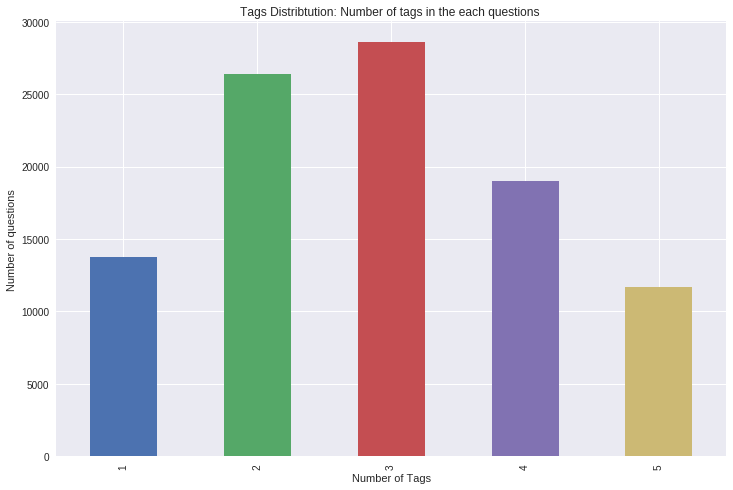

In [54]:
plt.figure(figsize=(12,8))
df_train['tag_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Tags Distribtution: Number of tags in the each questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

### Most Frequent Tags - WordCloud

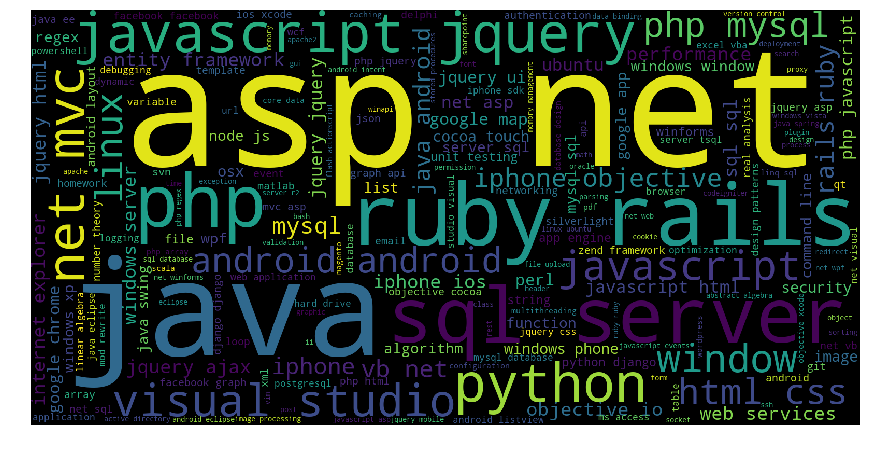

Time taken to run this cell : 0:00:06.623042


In [55]:
start = datetime.now()
frequent_tags = ' '.join(df_train['Tags'].values)
wordcloud = WordCloud(width=1600, height=800, margin=0).generate(frequent_tags)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.margins(x=0, y=0)
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

### The top 20 tags

In [56]:
tag_df.head(20)

,Tags,Counts
2010,c#,7745
8044,java,6753
11936,php,6545
8086,javascript,6102
569,android,5287
8294,jquery,4925
2017,c++,3258
12719,python,3063
7870,iphone,3038
1043,asp.net,2918


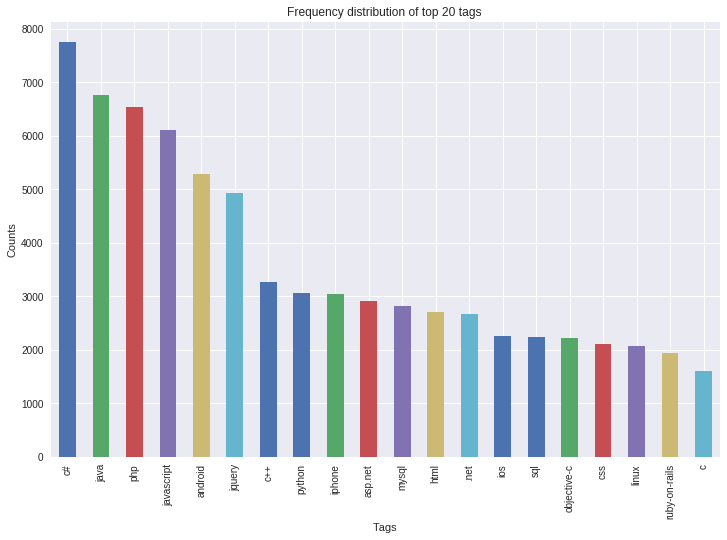

In [57]:
plt.figure(figsize=(12,8))
tag_df['Counts'].head(20).plot(kind='bar')
plt.xticks(np.arange(20), tag_df['Tags'])
plt.title("Frequency distribution of top 20 tags ")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.show()

### Observations from EDA

1. <b>Number of rows in the database:</b> 100000
2. <b>0.56% of the questions are duplicate:</b> Number of rows after removing duplicates:  99436
3. <b>Number of unique tags:</b> 18448
4. <b>Top 10 important tags:</b>  ['.a', '.bash-profile', '.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net']

5. Few number of tags have appeared more than 50000 times & the top 25 tags have appeared more than 10000 times
6. <h3>Tags analysis</h3>
    1. Maximum number of tags per question: 5 <br>
    2. Minimum number of tags per question: 1 <br>
    3. Avg. number of tags per question: 2.88 <br>
    4. Questions with 3 tags appeared more in number <br>
    5. <b>`asp`, `net`, `java`</b> are highligted in Word cloud of tags <br>
    6. <b>`C#`</b> appears most number of times, <b>`Java`</b> is the second most. Majority of the most frequent tags are programming language.


## Cleaning and preprocessing of Questions 


<i>P.S: <b>Due to hardware limitations, I am considering only 50K rows</b></i>

In [58]:
print("shape of data before training: ", df_train.shape)
df_train = df_train[:50000] # Due to hardware limitations, I am considering only 50K data points
print("shape of data after training: ", df_train.shape)

shape of data before training:  (99436, 5)
shape of data after training:  (50000, 5)


In [59]:
question_containing_codes = sum(df_train['Body'].apply(lambda txt: '<code>' in txt))
print("Questions containg HTML tag 'code': ", question_containing_codes)
print("Percentage of Questions containing HTML tag 'code': {}% ".format(round((question_containing_codes/df_train.shape[0])*100.0, 2)))

Questions containg HTML tag 'code':  27878
Percentage of Questions containing HTML tag 'code': 55.76% 


In [60]:
df_train.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


## Preprocessing
<ol>
   <li>55.76% percentage of questions contains HTML tag &lt;code&gt; tag. So separate out code-snippets from  the Body</li>
  <li>Remove Spcial characters from title and Body (not in code)</li>
  <li><b>Remove stop words (Except 'C')</b></li>
  <li>Remove HTML Tags</li>
  <li>Convert all the characters into small letters</li>
  <li>Use SnowballStemmer to stem the words.<br>
  <i>Stemming is the process of reducing a word to its word stem. <br>
  <b>For Example:</b> "python" is the stem word for the words ["python" "pythoner", "pythoning","pythoned"]</i></li>
  <li><b>Give more weightage to title: Add title three times to the question</b>. Title contains the information which is more specific to the question and also only <b>after seeing the question title, a user decides whether to look into the question in detail.</b> At least most of the users do this if not all </li>
</ol>

In [0]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

In [62]:
nltk.download('punkt')
start = datetime.now()
processed_questions = []
questions_proccesed = 0
for index, row in df_train.iterrows():
    title, question = row['Title'], row['Body']
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=strip_html(question.encode('utf-8'))
    title=title.encode('utf-8')
    # Question = title x 3 + question body
    question=(str(title) + " " )*3+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    questions_proccesed += 1
    processed_questions.append(question)
    if (questions_proccesed%10000==0):
        print("number of questions completed=",questions_proccesed)
print("Time taken to run this cell :", datetime.now() - start)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
number of questions completed= 10000
number of questions completed= 20000
number of questions completed= 30000
number of questions completed= 40000
number of questions completed= 50000
Time taken to run this cell : 0:01:38.523796


In [63]:
print('Questions after preprocessed')
print('___'*20)
for q in processed_questions[:5]:
    print(q)
    print('____'*25)

Questions after preprocessed
____________________________________________________________
check upload file imag without mime type check upload file imag without mime type check upload file imag without mime type like check upload file imag file png jpg jpeg gif bmp anoth file problem use uploadifi upload file chang mime type give text octal someth mime type matter file type upload way check upload file imag apart check file extens use php
____________________________________________________________________________________________________
prevent firefox close press ctrl prevent firefox close press ctrl prevent firefox close press ctrl favorit editor vim regular use ctrl execut certain action quit often happen firefox activ window window still look vim think vim activ window press ctrl close firefox want way stop ctrl close firefox rene
____________________________________________________________________________________________________
error invalid type list variabl error invalid type

In [64]:
tags = df_train['Tags']
preprocessed_title_more_weight_df = pd.DataFrame({'tags':tags, 'questions': processed_questions})
preprocessed_title_more_weight_df.head()

,tags,questions
0,php image-processing file-upload upload mime-t...,check upload file imag without mime type check...
1,firefox,prevent firefox close press ctrl prevent firef...
2,r matlab machine-learning,error invalid type list variabl error invalid ...
3,c# url encoding,replac special charact url replac special char...
4,php api file-get-contents,modifi whoi contact detail modifi whoi contact...


In [65]:
preprocessed_title_more_weight_df

,tags,questions
0,php image-processing file-upload upload mime-t...,check upload file imag without mime type check...
1,firefox,prevent firefox close press ctrl prevent firef...
2,r matlab machine-learning,error invalid type list variabl error invalid ...
3,c# url encoding,replac special charact url replac special char...
4,php api file-get-contents,modifi whoi contact detail modifi whoi contact...
5,proxy active-directory jmeter,set proxi activ directori environ set proxi ac...
6,core-plot,draw barplot way coreplot draw barplot way cor...
7,c# asp.net windows-phone-7,fetch xml feed use asp net fetch xml feed use ...
8,.net javascript code-generation,net librari generat javascript net librari gen...
9,sql variables parameters procedure calls,sql server procedur call inlin concaten imposs...


In [0]:
# saving preprocessed question-tags as pickle file
if not os.path.isfile('pickles/preprocessed_title_more_weight_df.pickle'):
    save_file(preprocessed_title_more_weight_df, 'pickles/preprocessed_title_more_weight_df') # save it to pickle file
preprocessed_title_more_weight_df = read_file('pickles/preprocessed_title_more_weight_df')

# Machine Learning Models

In [67]:
preprocessed_title_more_weight_df.shape

(50000, 2)

In [68]:
preprocessed_title_more_weight_df['tags'].head()

0    php image-processing file-upload upload mime-t...
1                                              firefox
2                            r matlab machine-learning
3                                      c# url encoding
4                            php api file-get-contents
Name: tags, dtype: object

In [69]:
# Tag counts
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true') # if binary='true', all non zero counts are set to 1. 

multilabel_y = vectorizer.fit_transform(preprocessed_title_more_weight_df['tags'])
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  50000
Total number of TAGS:  13912


Total number of questions:  50000
<br>
Total number of TAGS:  13912

In [70]:
multilabel_y.shape

(50000, 13912)

In [71]:
vectorizer.vocabulary_

{'php': 8939,
 'image-processing': 5544,
 'file-upload': 4158,
 'upload': 12694,
 'mime-types': 7370,
 'firefox': 4226,
 'r': 9713,
 'matlab': 7104,
 'machine-learning': 6941,
 'c#': 1522,
 'url': 12710,
 'encoding': 3664,
 'api': 635,
 'file-get-contents': 4133,
 'proxy': 9447,
 'active-directory': 159,
 'jmeter': 6169,
 'core-plot': 2369,
 'asp.net': 787,
 'windows-phone-7': 13386,
 '.net': 7,
 'javascript': 6063,
 'code-generation': 2007,
 'sql': 11261,
 'variables': 12828,
 'parameters': 8726,
 'procedure': 9339,
 'calls': 1597,
 'obfuscation': 8247,
 'reflector': 9943,
 'algorithm': 339,
 'language-agnostic': 6499,
 'random': 9777,
 'postfix': 9194,
 'migration': 7362,
 'mdaemon': 7153,
 'documentation': 3266,
 'latex3': 6540,
 'expl3': 3893,
 'windows-7': 13347,
 'url-routing': 12717,
 'conventions': 2328,
 'temporary-files': 11959,
 'wpf': 13565,
 'binding': 1213,
 'playframework': 9057,
 'minify': 7382,
 'xml': 13710,
 'hash': 5103,
 'multidimensional-array': 7694,
 'simplexml-

Here we are going to use <i><b>Problem Transformation(Binary Relevance)</b></i> method to solve the problem.

<h3>Binary Relevance:</h3><br> Here we are going to convert multi-label classification problem into multiple single class classification problems.For example if we are having 5 multi-label classification problem, then we need to train 5 single class classification models.

 Basically in this method, we treat each label (in our case its tag) as a separate single class classification problem. This technique is simple and is widely used.

Please refer to [analytics vidhya's blog](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/) to know more about the techniques to solve a Multi-Label classification problem.

### We will sample the number of tags instead considering all of them (due to limitation of computing power)

<h3>Downscaling of data</h3><br>
Coming back to our stackoverflow predictor problem, we need to train 13912 models literally!!!
Thats really huge (both in terms of time & speed) for a system with 8GM RAM & i5 processor. So we will sample the number of tags instead considering all of them. But how many tags to be sampled with the minimal information loss ? 

Plotting **'percentage of questions covered'** Vs **'Number of tags'** would help to solve this.

In [72]:
multilabel_y[:, np.argsort(multilabel_y.sum(axis=0).tolist()[0])[::-1][:5]]

<50000x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16276 stored elements in Compressed Sparse Row format>

In [0]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = np.argsort(t)[::-1] # sorting in ascending order
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [74]:
multilabel_y.sum(axis=1)

matrix([[5],
        [1],
        [3],
        ...,
        [2],
        [2],
        [4]])

In [75]:
# total tags
print("Total tags: ", multilabel_y.shape[1])

# total question
print("Total question: ", multilabel_y.shape[0])

Total tags:  13912
Total question:  50000


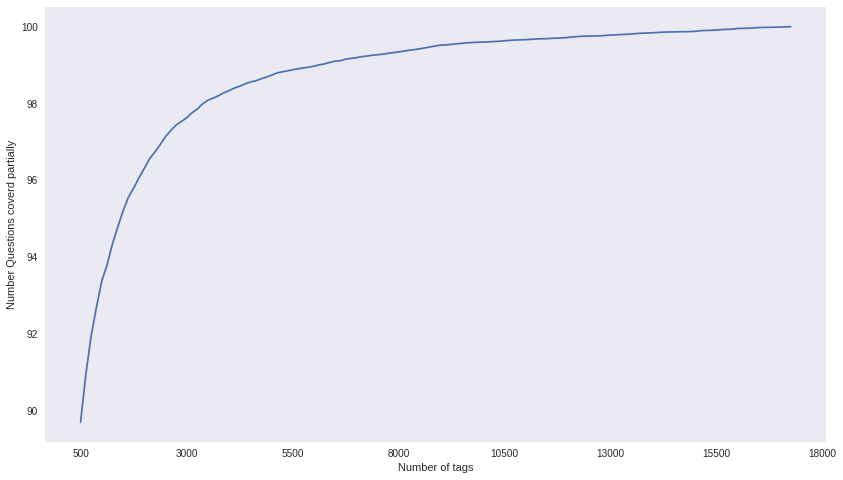

In [76]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=multilabel_y.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))
    
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

In [77]:
np.arange(500, total_tags, 100)

array([  500,   600,   700,   800,   900,  1000,  1100,  1200,  1300,
        1400,  1500,  1600,  1700,  1800,  1900,  2000,  2100,  2200,
        2300,  2400,  2500,  2600,  2700,  2800,  2900,  3000,  3100,
        3200,  3300,  3400,  3500,  3600,  3700,  3800,  3900,  4000,
        4100,  4200,  4300,  4400,  4500,  4600,  4700,  4800,  4900,
        5000,  5100,  5200,  5300,  5400,  5500,  5600,  5700,  5800,
        5900,  6000,  6100,  6200,  6300,  6400,  6500,  6600,  6700,
        6800,  6900,  7000,  7100,  7200,  7300,  7400,  7500,  7600,
        7700,  7800,  7900,  8000,  8100,  8200,  8300,  8400,  8500,
        8600,  8700,  8800,  8900,  9000,  9100,  9200,  9300,  9400,
        9500,  9600,  9700,  9800,  9900, 10000, 10100, 10200, 10300,
       10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200,
       11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100,
       12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000,
       13100, 13200,

In [78]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",5500,"tags we are covering ",questions_explained[list(tag_counts).index(5500)],"% of questions")

with  500 tags we are covering  89.7 % of questions
with  600 tags we are covering  90.954 % of questions
with  5500 tags we are covering  99.152 % of questions


#### By using only 600 tags (91% approximately) of the total 13912 tags we are loosing only 9% of the questions & also training 600 models is reasonable (Of course it also depends on the type of machine learning algo we choose). So we shall choose 600 tags.

In [79]:
# we will be taking 600 tags
multilabel_yx = tags_to_choose(600)
print("number of questions that are not covered :", questions_explained_fn(600),"out of ", total_qs)

number of questions that are not covered : 4523 out of  50000


### Train and Test data


In [80]:
preprocessed_title_more_weight_df.head()

,tags,questions
0,php image-processing file-upload upload mime-t...,check upload file imag without mime type check...
1,firefox,prevent firefox close press ctrl prevent firef...
2,r matlab machine-learning,error invalid type list variabl error invalid ...
3,c# url encoding,replac special charact url replac special char...
4,php api file-get-contents,modifi whoi contact detail modifi whoi contact...


In [0]:
train_datasize=0.8*preprocessed_title_more_weight_df.shape[0]
x_train=preprocessed_title_more_weight_df[:int(train_datasize)]
x_test=preprocessed_title_more_weight_df[int(train_datasize):]
y_train = multilabel_yx[0:int(train_datasize),:]
y_test = multilabel_yx[int(train_datasize):,:]

In [82]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 600)
Number of data points in test data : (10000, 600)


### Featurizing Engineering - TfIdf vectorizer upto 3-grams

### There are various ways to featurize text data. First lets featurize the question data with TfIdf vectorizer. [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) of sklearn helps here

In [83]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=50000, smooth_idf=True, norm="l2", \
                             sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:31.813104


In [84]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 50000) Y : (40000, 600)
Dimensions of test data X: (10000, 50000) Y: (10000, 600)


#### Applying Logistic Regression with OneVsRest Classifier (Binary Relevance method for Multi-label classification problem)

In [85]:
x_train_multilabel

<40000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 2121414 stored elements in Compressed Sparse Row format>

In [86]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:06:15.425162


In [87]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.2056
Hamming loss  0.0025076666666666667
Micro-average quality numbers
Precision: 0.6995, Recall: 0.3279, F1-measure: 0.4465
Macro-average quality numbers
Precision: 0.5061, Recall: 0.2540, F1-measure: 0.3191
              precision    recall  f1-score   support

           0       0.51      0.13      0.20       768
           1       0.76      0.42      0.54       626
           2       0.82      0.54      0.65       665
           3       0.78      0.45      0.57       646
           4       0.95      0.70      0.80       559
           5       0.87      0.64      0.74       485
           6       0.74      0.25      0.37       307
           7       0.72      0.40      0.52       296
           8 


## <u>Results</u>

Micro F1-measure: 0.4466

Macro F1-measure: 0.3192

### Featurizing Text Data with Bag Of Words (BOW) vectorizer upto 4 grams

<b>P.S:</b><i> I did try Featurizing Text Data with Bag Of Words, but my system was giving out of memory error. So again I have to downscale the data to 50k.</i> 

In [88]:
downscaled_weight_df = preprocessed_title_more_weight_df[:100000]
print(downscaled_weight_df.shape)

(50000, 2)


In [89]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(downscaled_weight_df['tags'])
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  50000
Total number of TAGS:  13912


###  13912 tags is very large for a normal system to process, so lets reduce the number of tags with minimal loss of questions

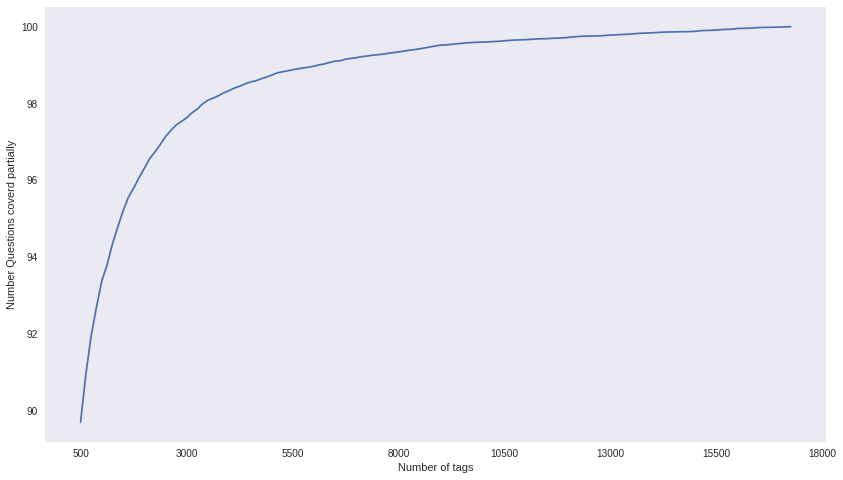

In [90]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=multilabel_y.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))
    
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

In [91]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",1000,"tags we are covering ",questions_explained[list(tag_counts).index(1000)],"% of questions")

with  500 tags we are covering  89.7 % of questions
with  600 tags we are covering  90.954 % of questions
with  1000 tags we are covering  93.792 % of questions


### lets choose 600 tags as we would cover approx 91% of the questions

In [0]:
multilabel_yx = tags_to_choose(600)

In [93]:
train_datasize=0.80*downscaled_weight_df.shape[0]
x_train=downscaled_weight_df[:int(train_datasize)]
x_test=downscaled_weight_df[int(train_datasize):]
y_train = multilabel_yx[0:int(train_datasize),:]
y_test = multilabel_yx[int(train_datasize):,:]
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 600)
Number of data points in test data : (10000, 600)


In [94]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00001,max_features=50000, ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:52.450562


In [95]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 50000) Y : (40000, 600)
Dimensions of test data X: (10000, 50000) Y: (10000, 600)


In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'))
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

### <u> Results</u>

Micro F1-measure: 0.4634

Macro F1-measure: 0.3598

## Hyperparam tuning on alpha (or lambda) for Logistic regression to improve the performance using GridSearch

In [0]:
x_train_multilabel.shape, y_train.shape

In [0]:
start = datetime.now()
c = [1e-3, 1e-2, 1e-1]
param_grid = {'estimator__C':c}
clf = OneVsRestClassifier(LogisticRegression(penalty='l1',multi_class='ovr'))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro', cv=3, verbose = 2, n_jobs=-1)
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
grid_search.best_estimator_

In [0]:
grid_search.best_params_

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', C=grid_search.best_params_['estimator__C']), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

### Observations
 Logistic Regression with c=1 performed better when compared to Logistic Regression with c=10 , so lets do a grid search for more values of c i.e,  2,4,6,8

In [0]:
start = datetime.now()
c = [2, 4, 6, 8]
param_grid = {'estimator__C':c}
clf = OneVsRestClassifier(LogisticRegression(penalty='l1',multi_class='ovr'))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
grid_search.best_params_

In [0]:
grid_search.cv_results_

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', C=grid_search.best_params_['estimator__C']), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

## Observation
1. Performance improved in Logistic regression model when c=6 than when c=10
2. But still Logistic regression without hyper parameter tuning performed bit better than the hypertuned logistic regression model. It is may be because of small amount of data. <i> If we take large data, then hypertuned logistic regression might perform better than the non-hypertuned logistic regression.</i>
3. Results
    1. Micro F1 Score: 0.4780
    2. Macro F1 Score: 0.3678

## OneVsRestClassifier  with Linear-SVM (SGDClassifier with loss-hinge)


### Linear-SVM (BOW vectorizer, n_gram=(1,4)

In [0]:
start = datetime.now()
estimator__alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 1e+1, 1e+2]
param_grid = {'estimator__alpha':estimator__alpha}
clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1', max_iter=1000,tol=0.0001 ))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
grid_search.best_params_['estimator__alpha']

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=grid_search.best_params_['estimator__alpha'], penalty='l1',  max_iter=1000,tol=0.0001 ), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

## <u>Results</u>

1. Micro F1 Score:  0.4007
2. Macro F1 Score: 0.243

###  Linear-SVM (tfidf vectorizer, n_gram=(1, 3))

In [0]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

In [0]:
start = datetime.now()
estimator__alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 1e+1, 1e+2]
param_grid = {'estimator__alpha':estimator__alpha}
clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1', max_iter=1000,tol=0.0001 ))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
grid_search.best_params_['estimator__alpha']

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=grid_search.best_params_['estimator__alpha'], penalty='l1',  max_iter=1000,tol=0.0001 ), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

## <u>Results</u>

1. Micro F1 Score:  0.4648
2. Macro F1 Score: 0.29

## Observations
1. Linear-SVM (tfidf vectorizer, n_gram=(1, 3)) performed very well than Linear-SVM (BOW vectorizer, n_gram=(1,4)

Of all the models we used so far, <i>Logistic Regression with TfIdf vectorizer and n_grams=(1,3)</i> performed better than rest of the models. But we have trained the Logistic Regression model with large number of data points, so comparing this model with rest the models, which are trained with lesser data points, will not make sense. So we need to train Logistic Regression model with (TfIdf vectorizer & n_grams=(1,3)) 100K data points. So the comparision between the models will be reasonable

### LogisticRegression with 100K data points

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

## <u>Results</u>

1. Micro F1 Score:  0.4648
2. Macro F1 Score: 0.3391

# Overall Observations

<table>
  <tr>
    <th>Model Used</th>
    <th>Number of Data Points Used</th>
    <th>F1-micro score</th>
    <th>F1-macro score</th>
  </tr>
  <tr>
    <td>Logistic Regression (with TfIdf vectorizer, n_grams=(1,3))</td>
    <td>500K</td>
    <td>0.4950</td>
    <td>0.3809</td>
  </tr>
  <tr>
    <td>Logistic Regression (with TfIdf vectorizer, n_grams=(1,3))</td>
    <td>100K</td>
    <td>0.4648</td>
    <td>0.3391</td>
  </tr>
  <tr style="background-color: #c9f5c9;">
    <td><b>Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha=1)</b></td>
    <td><b>100K</b></td>
    <td><b>0.4781</b></td>
    <td><b>0.3655</b></td>
  </tr>
  <tr>
    <td>Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha = 6 (from hyperparameter tuning))</td>
    <td>100K</td>
    <td>0.4774</td>
    <td>0.3676</td>
  </tr>
  <tr>
    <td>Linear-SVM (with BOW vectorizer, n_grams=(1, 4))</td>
    <td>100K</td>
    <td>0.4007</td>
    <td>0.2430</td>
  </tr>
  <tr>
    <td>Linear-SVM (with tfidf vectorizer, n_gram=(1, 3))</td>
    <td>100K</td>
    <td>0.4648</td>
    <td>0.2900</td>
  </tr>
</table>

### Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha=1) performed better than rest of the models


## Problem with complex models like Random Forests or GBDT ?

As you might have noticied, I have taken simplest model like Logistic Regression & Linear SVM to train the model. Here is the two primary main reasons why the complex models were not tried

1. <b>High dimentional data:</b> since we are converting text to TfIdf or BOW vectors, the dimensions we get are very large in size. And when the dimensions are large, typically Random Forests & GBDT won't work well.
2. <b>Too many models to train:</b> We have literally 600 models to train (after downscaling of data). And Logistic Regression is the simplest model one can use & it is comparitively faster. If we start using other models like RBF-SVM or RF, it will take too much time to train the model. For me it took more than 16 hours of time to train Linear SVM, that too after downscaling of data by large margin

## Enhancements:

1. To try with more data points (on a system with 32GB RAM & highend processor)
2. <b>Featurizing Text Data with Word2Vec:</b> When you try Word2Vec, the dimentionality of data reduces & hence complex models like Random Forests or GBDT might work well
3. Try using [scikit-multilearn](http://scikit.ml/) library. Please note that this library doesn't take sparse matrix as input, you need to give dense matrix as input.So obviously you need to have more RAM to use this library

### Please refer to this blog for detailed explanation: https://sachinkalsi.github.io/blog/category/ml/2018/08/22/stack-overflow-tag-prediction.html

<i>Any input/suggestions are most welcome @[Kalsi](mailto:sachinkalsi15@gmail.com)</i>